https://www.kaggle.com/competitions/titanic \
Score: 0.77272

In [2]:
import numpy as np
import pandas as pd
randomSeed=42
np.random.seed(randomSeed)

In [3]:
data = pd.read_csv("train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = ["Pclass", "Age", "SibSp",
               "Parch", "Fare", "PassengerId"]
cat_attribs = ["Sex","Embarked"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), 
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), 
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
# data= data[data['Embarked'].notna()]
processedData= preprocessing.fit_transform(data)
processedDf= pd.DataFrame(processedData, columns=preprocessing.get_feature_names_out())
processedDf.head()


,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__PassengerId,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.497793,0.432793,-0.473674,-0.502445,-1.730108,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.715048,0.432793,-0.473674,0.786845,-1.726220,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.194583,-0.474545,-0.473674,-0.488854,-1.722332,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.487640,0.432793,-0.473674,0.420730,-1.718444,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.487640,-0.474545,-0.473674,-0.486337,-1.714556,0.0,1.0,0.0,0.0,1.0


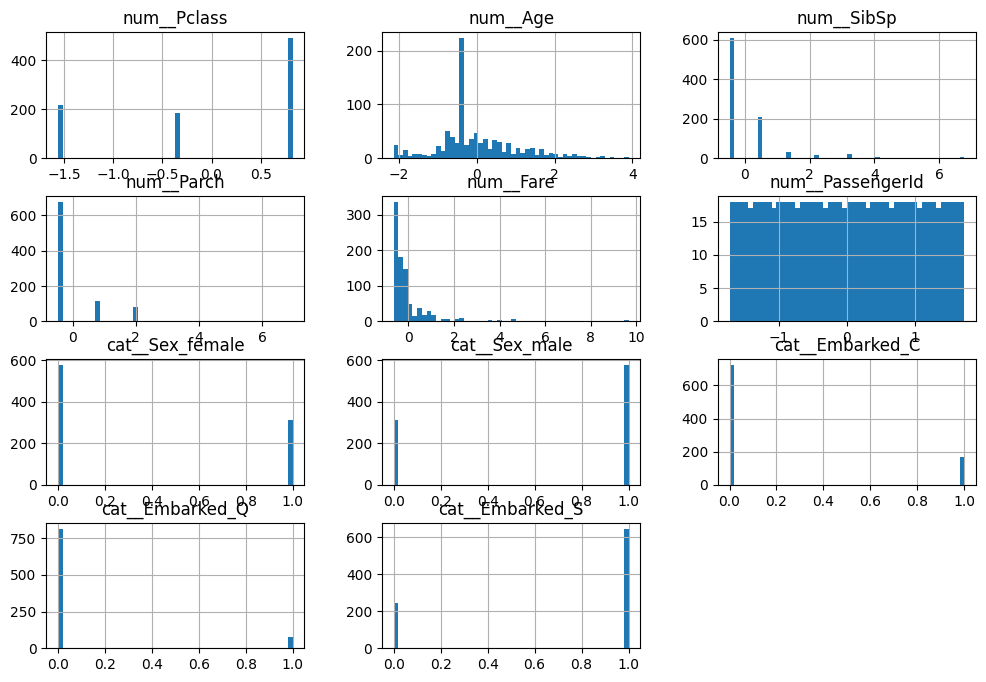

In [5]:
import matplotlib.pyplot as plt

processedDf.hist(bins=50, figsize=(12, 8))
plt.show()

In [6]:
corr_matrix = processedDf.corr()
corr_matrix

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,num__PassengerId,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
num__Pclass,1.000000,-0.356187,0.083081,0.018443,-0.549500,-0.035144,-0.131900,0.131900,-0.243292,0.221009,0.074053
num__Age,-0.356187,1.000000,-0.232411,-0.155118,0.107554,0.036186,-0.073377,0.073377,0.025811,-0.071806,0.022577
num__SibSp,0.083081,-0.232411,1.000000,0.414838,0.159651,-0.057527,0.114631,-0.114631,-0.059528,-0.026354,0.068734
num__Parch,0.018443,-0.155118,0.414838,1.000000,0.216225,-0.001652,0.245489,-0.245489,-0.011069,-0.081228,0.060814
num__Fare,-0.549500,0.107554,0.159651,0.216225,1.000000,0.012658,0.182333,-0.182333,0.269335,-0.117216,-0.162184
num__PassengerId,-0.035144,0.036186,-0.057527,-0.001652,0.012658,1.000000,-0.042939,0.042939,-0.001205,-0.033606,0.022204
cat__Sex_female,-0.131900,-0.073377,0.114631,0.245489,0.182333,-0.042939,1.000000,-1.000000,0.082853,0.074115,-0.119224
cat__Sex_male,0.131900,0.073377,-0.114631,-0.245489,-0.182333,0.042939,-1.000000,1.000000,-0.082853,-0.074115,0.119224
cat__Embarked_C,-0.243292,0.025811,-0.059528,-0.011069,0.269335,-0.001205,0.082853,-0.082853,1.000000,-0.148258,-0.782742
cat__Embarked_Q,0.221009,-0.071806,-0.026354,-0.081228,-0.117216,-0.033606,0.074115,-0.074115,-0.148258,1.000000,-0.499421


In [7]:
from sklearn.model_selection import train_test_split
y= data[["Survived"]].values.flatten()
X_train,X_validate,y_train,y_validate= train_test_split(processedData,y,test_size=0.1,random_state=randomSeed,shuffle=True) #using default
X_train.shape

(801, 11)

In [8]:
from sklearn.model_selection import cross_val_score
cv=3
def evaluateCV(model, X_train, y_train):
    return sum(cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy"))/cv

In [9]:
from sklearn.metrics import f1_score

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neighbours= 3
kn_clf = KNeighborsClassifier(n_neighbors=neighbours)
kn_clf.fit(X_train,y_train)
preds= kn_clf.predict(X_validate)
print(f1_score(y_validate,preds))
evaluateCV(kn_clf, X_train,y_train)

0.7945205479452054


0.7927590511860174

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=randomSeed)
sgd_clf.fit(X_train, y_train)
preds= sgd_clf.predict(X_validate)
print(f1_score(y_validate,preds))
evaluateCV(sgd_clf,X_train,y_train)

0.684931506849315


0.7116104868913858

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=randomSeed)
forest_clf.fit(X_train,y_train)
preds= forest_clf.predict(X_validate)
print(f1_score(y_validate,preds))
evaluateCV(forest_clf,X_train,y_train)

0.8


0.8127340823970037

In [17]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=randomSeed)
svm_clf.fit(X_train,y_train)
preds= svm_clf.predict(X_validate)
print(f1_score(y_validate,preds))
evaluateCV(svm_clf,X_train,y_train)

0.7945205479452054


0.8164794007490638

In [97]:
from sklearn.model_selection import GridSearchCV
poly_param = {'kernel':['poly'], 'C':[0.01, 0.1, 1, 10, 100, 1000],'degree':[2, 3, 4, 5]}
non_poly_param = {'kernel':['linear','rbf','sigmoid'], 'C':[0.01, 0.1, 1, 10, 100, 1000]}
model=SVC()
gs = GridSearchCV(model, param_grid=[poly_param,non_poly_param])
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3, 4, 5], 'kernel': ['poly']},
                         {'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear', 'rbf', 'sigmoid']}])

In [18]:
X_test= pd.read_csv("test.csv")
X_test.shape

(418, 11)

In [19]:
latestModel=SVC(C=1,degree=2,kernel='poly')
latestModel.fit(processedData,y)
processedtest= preprocessing.fit_transform(X_test)
y_test_pred= latestModel.predict(processedtest)

In [30]:
y_test = y_test_pred.astype(int)
df = pd.DataFrame({'Survived': y_test})
passengerId= X_test["PassengerId"]
df=df.join(passengerId)
df.set_index("PassengerId",inplace=True)
df.to_csv('titanic_submission.csv')